UNAD

Fabio Ernesto Ortiz Otalora

Prediccion de Enfermedad Cardiaca con Regresion Logistica


1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc. 
2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario. 
3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.
4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.
5. Entrenar el modelo configurando los diferentes hiperparámetros.
6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.
7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
8. Interpretar, analizar y documentar los resultados obtenidos.


1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.



In [5]:
#cargar las librerias necesarias

import pandas as pd # manejo y analisis de estructuras de datos
import numpy as np  # calculo numerico y el analisis de datos
import seaborn as sns # creacion graficos estadisticos
import matplotlib.pyplot as plt # creacion de graficos en 2 dimensiones

#librerias para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [9]:
# Lectura de datos en Python y lo cargamos en la variable datos

Datos = pd.read_csv('C:\\Users\\fabio\\OneDrive\\ING SISTEMAS\\6.2 ANALISIS DE DATOS\\TAREA 3\\cardiaca.csv')

In [11]:
# Realizamos Lectura de los Datos para el analisis exploratorio

Datos.head(40)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [13]:
# Descripcion de los datos
Datos.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario. 

Text(0.5, 1.0, 'Identificacion de Datos faltantes y atipicos - thalach')

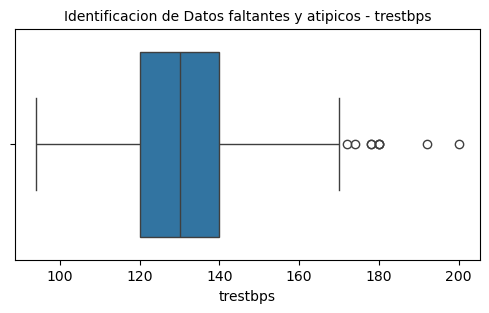

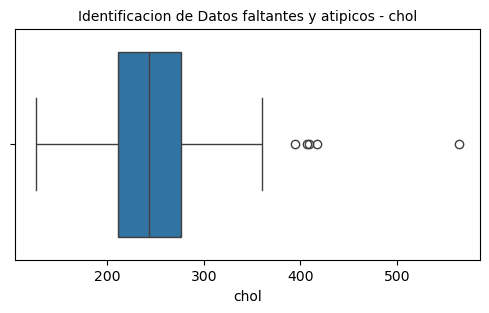

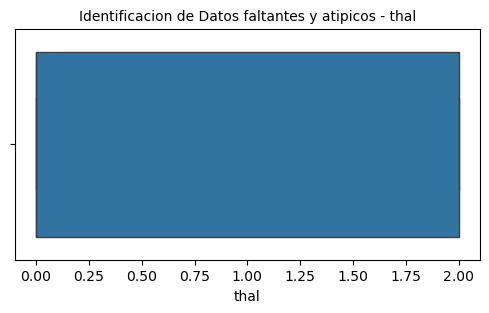

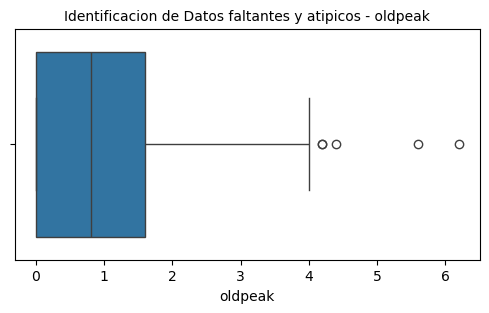

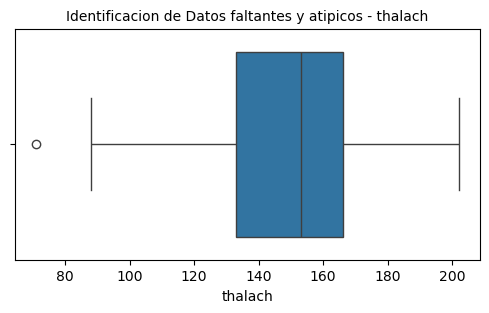

In [47]:
#Identificacion de Datos faltantes y atipicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['trestbps'])
plt.title( 'Identificacion de Datos faltantes y atipicos - trestbps', fontsize=10 )

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['chol'])
plt.title( 'Identificacion de Datos faltantes y atipicos - chol', fontsize=10 )

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['thal'])
plt.title( 'Identificacion de Datos faltantes y atipicos - thal', fontsize=10 )

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['oldpeak'])
plt.title( 'Identificacion de Datos faltantes y atipicos - oldpeak', fontsize=10 )

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['thalach'])
plt.title( 'Identificacion de Datos faltantes y atipicos - thalach', fontsize=10 )

In [41]:
# Revision de Datos faltantes

print("Cantidad de Registros con cero en Presión arterial en reposo: ", Datos['trestbps'].isin([0]).sum())
print("Cantidad de Registros con cero en Colesterol sérico: ", Datos['chol'].isin([0]).sum())
print("Cantidad de Registros con cero en Depresión de ST inducida: ", Datos['oldpeak'].isin([0]).sum())
print("Cantidad de Registros con cero en Talasemia: ", Datos['thal'].isin([0]).sum())
print("Cantidad de Registros con cero en Frecuencia cardíaca máxima alcanzada: ", Datos['thalach'].isin([0]).sum())

Cantidad de Registros con cero en Presión arterial en reposo:  0
Cantidad de Registros con cero en Colesterol sérico:  0
Cantidad de Registros con cero en Depresión de ST inducida:  96
Cantidad de Registros con cero en Talasemia:  164
Cantidad de Registros con cero en Frecuencia cardíaca máxima alcanzada:  0


In [51]:
# Reemplazar todos los ceros con el valor promedio de la columna

Datos['oldpeak']=Datos['oldpeak'].replace(0,Datos['oldpeak'].mean())
Datos['thal']=Datos['thal'].replace(0,Datos['thal'].mean())

In [53]:
# Revision nuevamente de datos faltantes

print("Cantidad de Registros con cero en Presión arterial en reposo: ", Datos['trestbps'].isin([0]).sum())
print("Cantidad de Registros con cero en Colesterol sérico: ", Datos['chol'].isin([0]).sum())
print("Cantidad de Registros con cero en Depresión de ST inducida: ", Datos['oldpeak'].isin([0]).sum())
print("Cantidad de Registros con cero en Talasemia: ", Datos['thal'].isin([0]).sum())
print("Cantidad de Registros con cero en Frecuencia cardíaca máxima alcanzada: ", Datos['thalach'].isin([0]).sum())


Cantidad de Registros con cero en Presión arterial en reposo:  0
Cantidad de Registros con cero en Colesterol sérico:  0
Cantidad de Registros con cero en Depresión de ST inducida:  0
Cantidad de Registros con cero en Talasemia:  0
Cantidad de Registros con cero en Frecuencia cardíaca máxima alcanzada:  0


Text(0.5, 1.0, 'Identificacion de Datos atipicos - thalach')

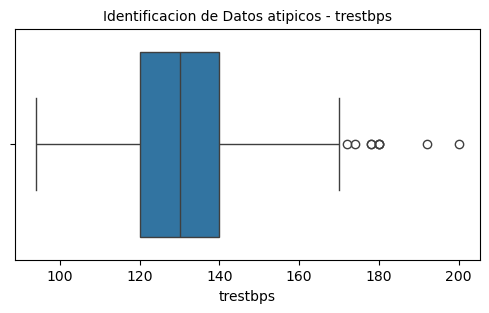

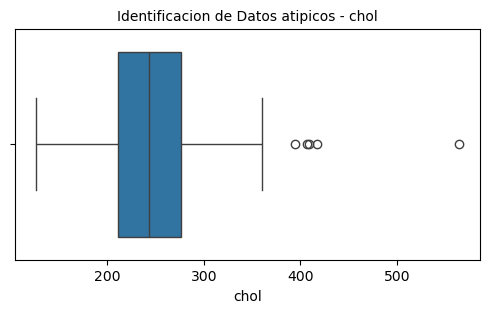

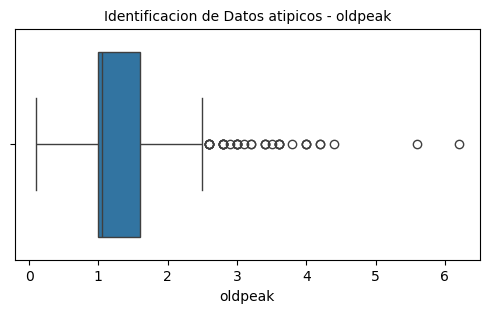

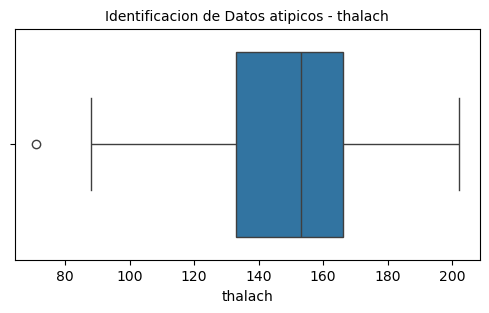

In [61]:
# Identificacion de datos atipicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['trestbps'])
plt.title( 'Identificacion de Datos atipicos - trestbps', fontsize=10 )

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['chol'])
plt.title( 'Identificacion de Datos atipicos - chol', fontsize=10 )

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['oldpeak'])
plt.title( 'Identificacion de Datos atipicos - oldpeak', fontsize=10 )

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['thalach'])
plt.title( 'Identificacion de Datos atipicos - thalach', fontsize=10 )

In [79]:
#Conteo de Datos Atipicos

nivel_minimots=110
nivel_maximots=170
Total_Atipicosts=((Datos['trestbps']<nivel_minimots)|(Datos['trestbps']>nivel_maximots)).sum()
print("El total de datos atipicos de trestbps es {}".format(Total_Atipicosts))

nivel_minimoch=125
nivel_maximoch=300
Total_Atipicosch=((Datos['chol']<nivel_minimoch)|(Datos['chol']>nivel_maximoch)).sum()
print("El total de datos atipicos de chol es {}".format(Total_Atipicosch))

nivel_minimoth=60
nivel_maximoth=180
Total_Atipicosth=((Datos['thalach']<nivel_minimoth)|(Datos['thalach']>nivel_maximoth)).sum()
print("El total de datos atipicos de thalach es {}".format(Total_Atipicosth))

nivel_minimoop=0
nivel_maximoop=2.5
Total_Atipicosop=((Datos['oldpeak']<nivel_minimoop)|(Datos['oldpeak']>nivel_maximoop)).sum()
print("El total de datos atipicos de oldpeak es {}".format(Total_Atipicosop))


El total de datos atipicos de trestbps es 29
El total de datos atipicos de chol es 44
El total de datos atipicos de thalach es 18
El total de datos atipicos de oldpeak es 38


In [89]:
#Filtra Datos atipicos

Datos=Datos[(Datos['trestbps']<nivel_maximots)&(Datos['trestbps']>nivel_minimots)]
Datos=Datos[(Datos['chol']<nivel_maximoch)&(Datos['chol']>nivel_minimoch)]
Datos=Datos[(Datos['thalach']<nivel_maximoth)&(Datos['thalach']>nivel_minimoth)]
Datos=Datos[(Datos['oldpeak']<nivel_maximoop)&(Datos['oldpeak']>nivel_minimoop)]

In [91]:
#Validar si se removieron los datos atipicos

nivel_minimots=110
nivel_maximots=170
Total_Atipicosts=((Datos['trestbps']<nivel_minimots)|(Datos['trestbps']>nivel_maximots)).sum()
print("El total de datos atipicos de trestbps es {}".format(Total_Atipicosts))

nivel_minimoch=125
nivel_maximoch=300
Total_Atipicosch=((Datos['chol']<nivel_minimoch)|(Datos['chol']>nivel_maximoch)).sum()
print("El total de datos atipicos de chol es {}".format(Total_Atipicosch))

nivel_minimoth=60
nivel_maximoth=180
Total_Atipicosth=((Datos['thalach']<nivel_minimoth)|(Datos['thalach']>nivel_maximoth)).sum()
print("El total de datos atipicos de thalach es {}".format(Total_Atipicosth))

nivel_minimoop=0
nivel_maximoop=2.5
Total_Atipicosop=((Datos['oldpeak']<nivel_minimoop)|(Datos['oldpeak']>nivel_maximoop)).sum()
print("El total de datos atipicos de oldpeak es {}".format(Total_Atipicosop))


El total de datos atipicos de trestbps es 0
El total de datos atipicos de chol es 0
El total de datos atipicos de thalach es 0
El total de datos atipicos de oldpeak es 0


In [93]:
# Revision del tipo de datos y datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        162 non-null    int64  
 1   sex        162 non-null    int64  
 2   cp         162 non-null    int64  
 3   trestbps   162 non-null    int64  
 4   chol       162 non-null    int64  
 5   fbs        162 non-null    int64  
 6   restecg    162 non-null    int64  
 7   thalach    162 non-null    int64  
 8   exang      162 non-null    int64  
 9   oldpeak    162 non-null    float64
 10  slope      162 non-null    int64  
 11  ca         162 non-null    int64  
 12  thal       162 non-null    float64
 13  condition  162 non-null    int64  
dtypes: float64(2), int64(12)
memory usage: 19.0 KB


3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

Caracteristicas de interes:

condition - Condición (1 = presencia de enfermedad cardíaca; 0 = ausencia de enfermedad cardíaca)
Predecir si una persona puede tener enfermedad cardiaca

In [97]:
# Total de personas con presencia de enfermedad cardiaca

Datos['condition'].value_counts()

condition
0    96
1    66
Name: count, dtype: int64

In [101]:
Datos[['condition']].head(40)

,condition
0,0
1,0
3,1
6,0
8,0
11,1
12,1
13,0
14,0
16,0


4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.

In [107]:
# Porcentaje de Datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

# Se crean variables X y Y para almacenar la informacion del entrenamiento

X = Datos.drop('condition' , axis=1) #Se cargan los datos de train sin los datos de la columna condition
Y = Datos['condition'] #Se cargan los Datos de train con los datos de la columna condition

#La funcion train_test_split crea una division de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state=0)

print (X_train)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang   oldpeak  \
245   54    1   3       120   188    0        0      113      0  1.400000   
17    51    1   0       125   213    0        2      125      1  1.400000   
146   42    1   2       130   180    0        0      150      0  1.055556   
36    56    1   1       120   240    0        0      169      0  1.055556   
230   57    1   3       130   131    0        0      115      1  1.200000   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...       ...   
23    74    0   1       120   269    0        2      121      1  0.200000   
189   62    0   3       138   294    1        0      106      0  1.900000   
210   59    1   3       164   176    1        2       90      0  1.000000   
31    58    1   1       120   284    0        2      160      0  1.800000   
126   50    1   2       140   233    0        0      163      0  0.600000   

     slope  ca      thal  
245      1   1  2.000000  
17       0   1  0.835

In [109]:
print (Y_train)

245    1
17     0
146    0
36     0
230    1
      ..
23     0
189    1
210    1
31     1
126    1
Name: condition, Length: 121, dtype: int64


5. Entrenar el modelo configurando los diferentes hiperparámetros.

In [111]:
# Construir el modelo de Regresión Logística

modelo_regresion = LogisticRegression(solver = "liblinear") # Liblinear es una libreria para resolver problemas lineales de clasificacion y regresion
modelo_regresion.fit (X_train , Y_train)

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) # La funcion predice los valores a partir del conjunto de datos de validacion

In [113]:
print (Y_test)

142    0
147    0
225    1
203    1
217    1
77     0
95     0
124    0
139    0
226    1
285    0
103    1
25     0
237    1
168    1
296    1
12     1
145    0
78     0
40     0
266    0
82     0
41     0
104    0
75     1
26     1
218    0
135    0
294    1
243    1
276    0
190    1
174    1
102    0
134    0
3      1
272    0
80     1
20     0
50     0
156    0
Name: condition, dtype: int64


In [115]:
print (Prediccion)

[0 0 1 1 1 0 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0
 0 0 0 0]


6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

In [119]:
print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90        24
           1       0.93      0.76      0.84        17

    accuracy                           0.88        41
   macro avg       0.89      0.86      0.87        41
weighted avg       0.88      0.88      0.88        41



7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

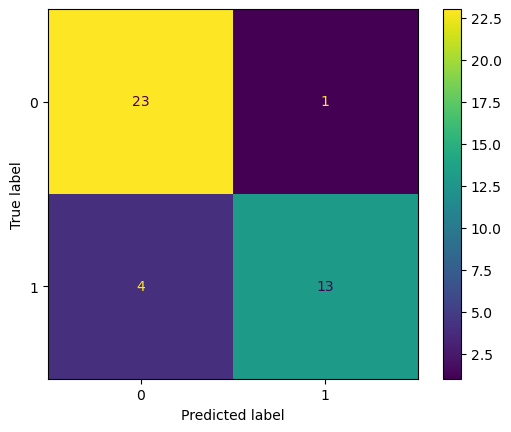

In [125]:
# Matrix de confusion del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

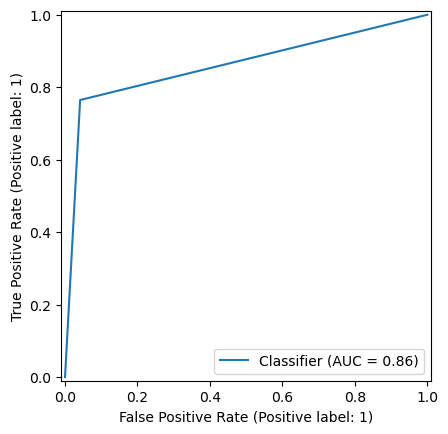

In [127]:
# Curva de precision del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()

8. Interpretar, analizar y documentar los resultados obtenidos.

Del desempeño del modelo podemos descrbir:

Precisión (precision):

Para la clase 0 (ausencia de enfermedad): La precisión es 0.85, lo que significa que el 85% de las veces en que el modelo predice que un caso pertenece a esta clase, la predicción es correcta.

Para la clase 1 (presencia de enfermedad): La precisión es 0.93, lo que indica que cuando el modelo predice esta clase, el 93% de esas predicciones son correctas.

La precisión global es alta, especialmente en la clase 1, lo cual sugiere que el modelo es efectivo para identificar casos con la enfermedad, aunque en esta clase también hay más falsos negativos.

Recall (Sensibilidad):

Para la clase 0: El recall es 0.96, lo que indica que el modelo identifica correctamente el 96% de los casos que realmente no tienen la enfermedad.

Para la clase 1: El recall es 0.76, lo que significa que el modelo identifica el 76% de los casos que realmente tienen la enfermedad, dejando un 24% de casos de la clase 1 sin identificar (falsos negativos).

Este menor recall en la clase 1 indica que el modelo podría mejorar en la detección de casos positivos, ya que algunos pacientes con la condición no están siendo identificados.

f1-score:

El f1-score equilibra precisión y recall, proporcionando una métrica más balanceada.

Para la clase 0, el f1-score es 0.90, mientras que para la clase 1 es 0.84. Estos valores altos indican que el modelo es bastante eficaz en la clasificación de ambas clases, aunque muestra una leve reducción en la efectividad para la clase 1 debido a la menor sensibilidad.

Exactitud (accuracy):

La exactitud general del modelo es 0.88 o 88%, lo que significa que en promedio el modelo clasifica correctamente el 88% de los casos.

Esto es un buen nivel de exactitud y sugiere que el modelo está haciendo un buen trabajo en general.

Promedios macro y ponderado:

El macro promedio proporciona una media simple de las métricas de cada clase sin tener en cuenta la cantidad de ejemplos en cada clase, mientras que el promedio ponderado considera la proporción de cada clase.

Los valores de estas métricas son similares (aproximadamente 0.88 en promedio ponderado para precisión, recall y f1-score), lo que indica que el modelo funciona de manera consistente en ambas clases sin favorecer una sobre la otra.

Conclusión:
El modelo de clasificación muestra un buen rendimiento general, con una alta precisión y exactitud. Sin embargo, el recall de la clase 1 (presencia de enfermedad) podría mejorar, ya que el modelo deja sin identificar algunos casos de la clase positiva. Esto podría ser relevante si el objetivo del modelo es detectar todos los casos de enfermedad posibles.

De la matriz de confusion podemos interpretar:

Verdaderos Positivos (Clase 1 predicha correctamente):

Hay 13 casos donde el modelo predijo correctamente la clase 1 (presencia de enfermedad), lo cual significa que estos casos fueron clasificados correctamente como positivos.

Verdaderos Negativos (Clase 0 predicha correctamente):

Hay 23 casos donde el modelo predijo correctamente la clase 0 (ausencia de enfermedad). Esto muestra que el modelo tiene buen desempeño en identificar correctamente a los pacientes que no tienen la enfermedad.

Falsos Positivos (Clase 1 incorrectamente predicha como Clase 0):

Solo hay 1 caso donde el modelo predijo la clase 1 cuando en realidad era la clase 0. Este valor bajo sugiere que el modelo no está clasificando erróneamente muchas observaciones negativas como positivas, lo cual es favorable para evitar alarmas falsas.

Falsos Negativos (Clase 0 incorrectamente predicha como Clase 1):

Hay 4 casos donde el modelo predijo la clase 0 cuando en realidad era la clase 1, lo que indica que algunos casos de la enfermedad no fueron detectados (falsos negativos). Esto es importante a considerar si se desea minimizar el riesgo de no identificar casos positivos.

Interpretación General:
La matriz muestra que el modelo tiene un buen rendimiento en general, ya que la mayoría de las predicciones son correctas. Sin embargo, existe una ligera inclinación a clasificar algunos casos de la clase 1 (presencia de enfermedad) como clase 0, lo que puede ser preocupante en un contexto médico donde los falsos negativos pueden tener implicaciones graves.
Este análisis sugiere que el modelo podría mejorar en la detección de la clase 1, posiblemente ajustando umbrales o utilizando técnicas para reducir los falsos negativos.

De la curva de precisión del modelo y el valor de AUC (Área Bajo la Curva) = 0.86, podemos interpretar lo siguiente:

AUC = 0.86:

Un valor de AUC de 0.86 indica un buen desempeño del modelo, ya que se acerca al valor ideal de 1. Esto significa que el modelo es capaz de distinguir correctamente entre las clases positiva y negativa en el 86% de los casos.

En términos generales, un AUC entre 0.8 y 0.9 se considera "bueno". Esto sugiere que el modelo tiene una alta capacidad para clasificar correctamente a los pacientes con y sin enfermedad.

Interpretación de la Curva de Precisión:

La curva de precisión-recall (precisión-cobertura) es especialmente útil en casos donde hay una clase minoritaria o cuando los falsos negativos son más costosos de evitar, como en contextos de salud.
Un buen valor de precisión indica que, de todas la
s instancias que el modelo predice como positivas, un alto porcentaje son verdaderamente positivas.
La cobertura (recall) representa la capacidad del modelo para detectar verdaderos positivos. En este caso, el valor de AUC de 0.86 sugiere que el modelo está equilibrado y es capaz de mantener un buen nivel de precisión y cobertura.

Aplicación en el Contexto de Salud:

Un AUC de 0.86 sugiere que el modelo es confiable para predecir la presencia o ausencia de enfermedad. Sin embargo, para mejorar su aplicabilidad en el contexto médico, se podría intentar optimizar el modelo para reducir la cantidad de falsos negativos, ya que estos errores pueden tener consecuencias importantes en términos de salud.

En resumen, el modelo tiene un desempeño adecuado y es eficaz en la clasificación de las clases, pero puede ser necesario optimizarlo para mejorar la sensibilidad (recall) hacia la detección de casos positivos (presencia de enfermedad).
